In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
# ignore the warning you might get from importing ensemble from sklearn
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier

import seaborn as sns

# 2.1 EDA and Data Visualization
# Which college has the best performance in training players？ 

- Term

3ptapg -- 3 point attempted per game

3ptpct --	                   3 point percentage 

3ptpg  --	     3 points per game = 3ptapg * 3ptpct

efgpct --	     Effective field goal percentage = (FG + 0.5*3p)/FGA

FGA	    --    average field goals attempted

fg%	  --      Field goal percentage

fg_per_game	

fga_per_game	

ft%	  --      Free throw = FT / FTA

ft_per_g --	   FT

fta_p_g	 --   FTA

g_play	--   goal

ppg	 --    Points per game


In [2]:
college_Data = pd.read_csv('college.csv')
college_Data.drop(columns=['Unnamed: 0'], inplace = True)
college_Data.fillna(value=0, inplace= True)
college_Data = college_Data[college_Data['college'] != 0]
college_Data

active_from  active_to birth_date  \
0            1991       1995  24-Jun-68   
1            1969       1978   7-Apr-46   
2            1970       1989  16-Apr-47   
3            1991       2001   9-Mar-69   
4            1998       2003   3-Nov-74   
...           ...        ...        ...   
4568         2006       2006   2-Dec-81   
4569         2017       2017   9-Sep-96   
4572         1983       1983  20-Dec-53   
4573         1971       1971   7-Jun-48   
4575         1949       1949  19-Dec-19   

                                                college height  \
0                                       Duke University  6?10?   
1                                 Iowa State University   6?9?   
2                 University of California, Los Angeles   7?2?   
3                            Louisiana State University   6?1?   
4     University of Michigan, San Jose State University   6?6?   
...                                                 ...    ...   
4568                       Mississippi State University   6?3?   
4569                    University of Nevada, Las Vegas    7-0   
4572                              Kent State University   7?1?   
4573                                Duquesne University   6?1?   
4575                       George Washington University   6?3?   

                     name position                        url  weight  \
0          Alaa Abdelnaby      F-C  /players/a/abdelal01.html   240.0   
1         Zaid Abdul-Aziz      C-F  /players/a/abdulza01.html   235.0   
2     Kareem Abdul-Jabbar        C  /players/a/abdulka01.html   225.0   
3      Mahmoud Abdul-Rauf        G  /players/a/abdulma02.html   162.0   
4       Tariq Abdul-Wahad        F  /players/a/abdulta01.html   223.0   
...                   ...      ...                        ...     ...   
4568    Derrick Zimmerman        G  /players/z/zimmede01.html   195.0   
4569    Stephen Zimmerman        C  /players/z/zimmest01.html   240.0   
4572             Jim Zoet        C   /players/z/zoetji01.html   240.0   
4573            Bill Zopf        G   /players/z/zopfbi01.html   170.0   
4575           Matt Zunic      G-F  /players/z/zunicma01.html   195.0   

      NBA__3ptapg  ...  NCAA__3ptpg  NCAA_efgpct  NCAA_fgapg  NCAA_fgpct  \
0             0.0  ...          0.0          0.0         5.6       0.599   
1             0.0  ...          0.0          0.0         0.0       0.000   
2             0.0  ...          0.0          0.0        16.8       0.639   
3             2.3  ...          2.7          0.0        21.9       0.474   
4             0.3  ...          0.0          0.0         0.0       0.000   
...           ...  ...          ...          ...         ...         ...   
4568          0.0  ...          0.3          0.0         5.2       0.477   
4569          0.0  ...          0.2          0.0         8.2       0.477   
4572          0.0  ...          0.0          0.0         2.9       0.476   
4573          0.0  ...          0.0          0.0         0.0       0.000   
4575          0.0  ...          0.0          0.0         0.0       0.000   

      NCAA_fgpg  NCAA_ft  NCAA_ftapg  NCAA_ftpg  NCAA_games  NCAA_ppg  
0           3.3    0.728         2.5        1.8       134.0       8.5  
1           0.0    0.000         0.0        0.0         0.0       0.0  
2          10.7    0.628         7.9        5.0        88.0      26.4  
3          10.4    0.863         6.4        5.5        64.0      29.0  
4           0.0    0.000         0.0        0.0         0.0       0.0  
...         ...      ...         ...        ...         ...       ...  
4568        2.5    0.600         2.6        1.6       127.0       6.9  
4569        3.9    0.624         3.9        2.4        26.0      10.5  
4572        1.4    0.429         1.0        0.4        63.0       3.2  
4573        0.0    0.000         0.0        0.0         0.0       0.0  
4575        0.0    0.000         0.0        0.0         0.0       0.0  

[4274 rows x 33 columns]

In [3]:
#sum of scores
college_sum = college_Data[['college','NBA_g_played']]
college_sum = college_sum.groupby('college').agg(sum)
college_sum = college_sum.sort_values(by = "NBA_g_played", ascending = False)
college_sum.reset_index(inplace= True)
college_sum.head()

college  NBA_g_played
0           University of North Carolina         34253
1  University of California, Los Angeles         33460
2                 University of Kentucky         27566
3                        Duke University         22801
4                   University of Kansas         22028

In [4]:
#size -- number of players
college_size = college_Data[['college','NBA_g_played']]
college_size = college_size.groupby('college').agg(len)
college_size = college_size.sort_values(by = "NBA_g_played", ascending = False)
# college_size = college_size.groupby('college').size().sort_values( ascending = False)
college_size.reset_index(inplace= True)
college_size.head()

college  NBA_g_played
0                 University of Kentucky            96
1           University of North Carolina            87
2  University of California, Los Angeles            87
3                        Duke University            67
4                   University of Kansas            67

In [5]:
#mean 
college_mean = college_Data[['college','NBA_g_played']]
college_mean = college_mean.groupby('college').agg(lambda x: np.mean(x))
college_mean = college_mean.sort_values(by = "NBA_g_played", ascending = False)
college_mean.reset_index(inplace= True)
college_mean.head()

college  NBA_g_played
0  Gardner-Webb University, Jacksonville University        1329.0
1             University of Wisconsin-Stevens Point        1274.0
2                    University of Central Arkansas        1178.0
3                               Longwood University        1153.0
4         Cameron University, St. John's University        1124.0

In [6]:
#3 points
college_3pmean = college_Data[['college','NBA__3ptpg']]
college_3pmean = college_3pmean.groupby('college').agg(lambda x: np.mean(x))
college_3pmean = college_3pmean.sort_values(by = "NBA__3ptpg", ascending = False)
college_3pmean.reset_index(inplace= True)

college_3pmean.head()

college  NBA__3ptpg
0                                  Lehigh University         1.9
1      Mississippi State University, Duke University         1.9
2         University of Oregon, Marquette University         1.8
3  Trinity Valley Community College, University o...         1.7
4       Bradley University, University of New Mexico         1.7

In [7]:
#3 points
college_3psum = college_Data[['college','NBA__3ptpg']]
college_3psum = college_3psum.groupby('college').agg(sum)
college_3psum = college_3psum.sort_values(by = "NBA__3ptpg", ascending = False)
college_3psum.reset_index(inplace= True)
college_3psum.head()


college  NBA__3ptpg
0                 University of Kentucky        32.6
1  University of California, Los Angeles        25.8
2           University of North Carolina        25.4
3                  University of Arizona        23.7
4                        Duke University        23.7

In [10]:
colleagelist = ['University of Kentucky', 'University of California, Los Angeles', 'University of North Carolina', 'Duke University', 'University of Kansas','All Colleage Ave']

sum_list = college_sum.copy()
sum_list['Total Points Rank'] = np.arange(1,np.shape(sum_list)[0] + 1)
sum_list.loc[np.shape(sum_list)[0]] = ['All Colleage Ave', college_sum['NBA_g_played'].mean(), '']
sum_list.rename(columns={"NBA_g_played": "Total Points"},inplace = True)
sum_list = sum_list[sum_list["college"].isin(colleagelist)]
# college_size

size_list = college_size.copy()
size_list['Ave Players Rank'] = np.arange(1,np.shape(size_list)[0] + 1)
size_list.loc[np.shape(size_list)[0]] = ['All Colleage Ave', college_size['NBA_g_played'].mean(), '']
size_list.rename(columns={"NBA_g_played": "Avg Players"},inplace = True)
size_list = size_list[size_list["college"].isin(colleagelist)]

mean_list = college_mean.copy()
mean_list['Ave Points Rank'] = np.arange(1,np.shape(mean_list)[0] + 1)
mean_list.loc[np.shape(mean_list)[0]] = ['All Colleage Ave', college_mean['NBA_g_played'].mean(), '']
mean_list.rename(columns={"NBA_g_played": "Avg Points"},inplace = True)
mean_list = mean_list[mean_list["college"].isin(colleagelist)]

threept_list = college_3psum.copy()
threept_list['Total 3pt Rank'] = np.arange(1,np.shape(threept_list)[0] + 1)
threept_list.loc[np.shape(threept_list)[0]] = ['All Colleage Ave', college_3psum['NBA__3ptpg'].mean(), '']
threept_list.rename(columns={"NBA__3ptpg": "Sum 3pt"},inplace = True)
threept_list = threept_list[threept_list["college"].isin(colleagelist)]
threept_list

thrav_list = college_3pmean.copy()
thrav_list['Ave 3pt Rank'] = np.arange(1,np.shape(thrav_list)[0] + 1)
thrav_list.loc[np.shape(thrav_list)[0]] = ['All Colleage Ave', college_3pmean['NBA__3ptpg'].mean(), '']
thrav_list.rename(columns={"NBA__3ptpg": "Avg 3pt"},inplace = True)
thrav_list = thrav_list[thrav_list["college"].isin(colleagelist)]
threept_list

total = sum_list.copy()
total = pd.merge(total, size_list, on='college')
total = pd.merge(total, mean_list, on='college')
total = pd.merge(total, threept_list, on='college')
total = pd.merge(total, thrav_list, on='college')
total

college  Total Points Total Points Rank  \
0           University of North Carolina  34253.000000                 1   
1  University of California, Los Angeles  33460.000000                 2   
2                 University of Kentucky  27566.000000                 3   
3                        Duke University  22801.000000                 4   
4                   University of Kansas  22028.000000                 5   
5                       All Colleage Ave   1630.925978                     

   Avg Players Ave Players Rank  Avg Points Ave Points Rank    Sum 3pt  \
0    87.000000                2  393.712644             111  25.400000   
1    87.000000                3  384.597701             118  25.800000   
2    96.000000                1  287.145833             217  32.600000   
3    67.000000                4  340.313433             151  23.700000   
4    67.000000                5  328.776119             167  17.100000   
5     5.969274                   219.476613                   1.181285   

  Total 3pt Rank   Avg 3pt Ave 3pt Rank  
0              3  0.291954          147  
1              2  0.296552          145  
2              1  0.339583          107  
3              5  0.353731           98  
4              7  0.255224          164  
5                 0.176468

# Can you predict how good a player will be based on their college statistics? Is there more of a correlation  of one and done players or four year players?

- EDA

In [6]:
college_Data = pd.read_csv('college.csv')
data = college_Data.loc[:,"NCAA_fgapg":"NCAA_ppg"]
# data["NBA_g_played"]= college_Data["NBA_g_played"]
data["NBA_ppg"]= college_Data["NBA_ppg"]
data.dropna(inplace=True)
data.head()

NCAA_fgapg  NCAA_fgpct  NCAA_fgpg  NCAA_ft  NCAA_ftapg  NCAA_ftpg  \
0         5.6       0.599        3.3    0.728         2.5        1.8   
2        16.8       0.639       10.7    0.628         7.9        5.0   
3        21.9       0.474       10.4    0.863         6.4        5.5   
5        14.2       0.518        7.4    0.683         8.9        6.1   
6         4.5       0.533        2.4    0.689         1.7        1.1   

   NCAA_games  NCAA_ppg  NBA_ppg  
0       134.0       8.5      5.7  
2        88.0      26.4     24.6  
3        64.0      29.0     14.6  
5        28.0      21.1     18.1  
6       110.0       5.9      5.6

In [7]:
clusterdata = college_Data.copy()
clusterdata["NBA_efgpct"].fillna(-1, inplace = True)
clusterdata["NBA_ppg"].isnull().any()

False

- Clustering

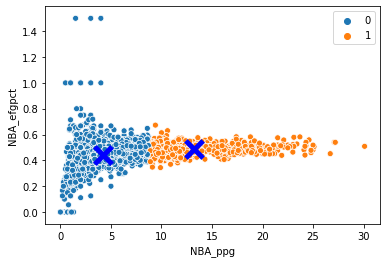

In [8]:
from sklearn import cluster

clusterdata = college_Data.copy()
clusterdata["NBA_efgpct"].fillna(-1, inplace = True)
clusterdata = clusterdata[clusterdata['NBA_efgpct'] >= 0]
kmeans_q1 = cluster.KMeans(n_clusters = 2, random_state= 52).fit(np.array(clusterdata[['NBA_ppg','NBA_efgpct']]))
sns.scatterplot(x=clusterdata['NBA_ppg'], y=clusterdata['NBA_efgpct'],hue=kmeans_q1.labels_)
sns.scatterplot(kmeans_q1.cluster_centers_[:, 0], kmeans_q1.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5)

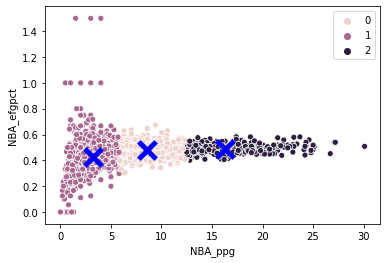

In [9]:
clusterdata = college_Data.copy()
clusterdata["NBA_efgpct"].fillna(-1, inplace = True)
clusterdata = clusterdata[clusterdata['NBA_efgpct'] >= 0]
kmeans_q1 = cluster.KMeans(n_clusters = 3, random_state= 52).fit(np.array(clusterdata[['NBA_ppg','NBA_efgpct']]))
sns.scatterplot(x=clusterdata['NBA_ppg'], y=clusterdata['NBA_efgpct'],hue=kmeans_q1.labels_)
sns.scatterplot(kmeans_q1.cluster_centers_[:, 0], kmeans_q1.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5)

In [10]:
college_Data[college_Data["NBA_ppg"] == np.max(college_Data["NBA_ppg"])]

Unnamed: 0  active_from  active_to birth_date  \
674          674         1960       1973  21-Aug-36   
2126        2126         1985       2003  17-Feb-63   

                           college height              name position  \
674           University of Kansas   7?1?  Wilt Chamberlain        C   
2126  University of North Carolina   6?6?    Michael Jordan      G-F   

                            url  weight  ...  NCAA__3ptpg  NCAA_efgpct  \
674   /players/c/chambwi01.html   275.0  ...          NaN          NaN   
2126  /players/j/jordami01.html   195.0  ...          0.9          NaN   

      NCAA_fgapg  NCAA_fgpct  NCAA_fgpg  NCAA_ft  NCAA_ftapg  NCAA_ftpg  \
674         22.3        0.47       10.5    0.619        14.4        8.9   
2126        13.2        0.54        7.1    0.748         4.2        3.1   

      NCAA_games  NCAA_ppg  
674         48.0      29.9  
2126       101.0      17.7  

[2 rows x 34 columns]

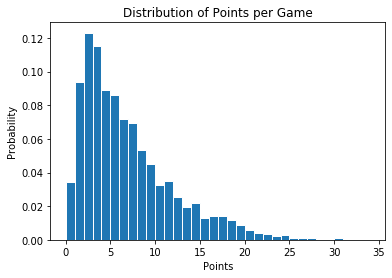

In [11]:
plt.hist(data["NBA_ppg"], bins=np.arange(0,35,1), density = True, ec='white')
plt.ylabel('Probability')
plt.xlabel('Points');
plt.title('Distribution of Points per Game');

In [12]:
data.loc[:,"NCAA_fgapg":"NBA_ppg"].corr()

NCAA_fgapg  NCAA_fgpct  NCAA_fgpg   NCAA_ft  NCAA_ftapg  \
NCAA_fgapg    1.000000   -0.189353   0.943653  0.290086    0.655322   
NCAA_fgpct   -0.189353    1.000000   0.122386 -0.291276    0.104923   
NCAA_fgpg     0.943653    0.122386   1.000000  0.204498    0.693703   
NCAA_ft       0.290086   -0.291276   0.204498  1.000000    0.094378   
NCAA_ftapg    0.655322    0.104923   0.693703  0.094378    1.000000   
NCAA_ftpg     0.687502    0.021227   0.698981  0.347569    0.958907   
NCAA_games   -0.204849   -0.003013  -0.200553  0.125572   -0.201736   
NCAA_ppg      0.950097    0.008719   0.964393  0.323379    0.786587   
NBA_ppg       0.461315    0.110703   0.506419  0.137425    0.415970   

            NCAA_ftpg  NCAA_games  NCAA_ppg   NBA_ppg  
NCAA_fgapg   0.687502   -0.204849  0.950097  0.461315  
NCAA_fgpct   0.021227   -0.003013  0.008719  0.110703  
NCAA_fgpg    0.698981   -0.200553  0.964393  0.506419  
NCAA_ft      0.347569    0.125572  0.323379  0.137425  
NCAA_ftapg   0.958907   -0.201736  0.786587  0.415970  
NCAA_ftpg    1.000000   -0.158908  0.821050  0.427123  
NCAA_games  -0.158908    1.000000 -0.192733 -0.252014  
NCAA_ppg     0.821050   -0.192733  1.000000  0.507816  
NBA_ppg      0.427123   -0.252014  0.507816  1.000000

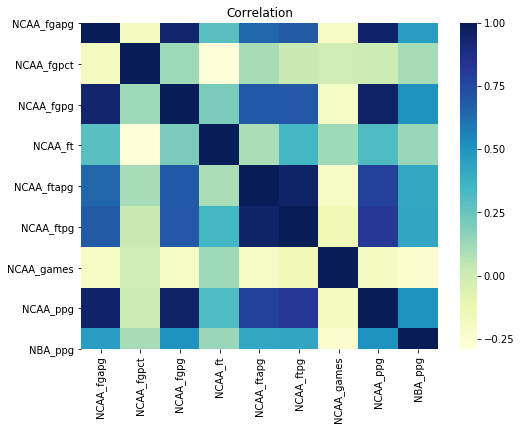

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.loc[:,"NCAA_fgapg":"NBA_ppg"].corr(), cmap="YlGnBu")
plt.title('Correlation')
plt.show()

In [14]:
data.isna().sum()

NCAA_fgapg    0
NCAA_fgpct    0
NCAA_fgpg     0
NCAA_ft       0
NCAA_ftapg    0
NCAA_ftpg     0
NCAA_games    0
NCAA_ppg      0
NBA_ppg       0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

pclass = data.copy()

def point3Class(x):
    if x <= 3:
        return "C"
    elif x <= 20:
        return "B"
    else:
        return "A"

def point2Class(x):
    if x <=  10:
        return "Bad"
    else:
        return "Good"

pclass['point3Class'] = pclass["NBA_ppg"].map(point3Class)
pclass['point2Class'] = pclass["NBA_ppg"].map(point2Class)
pclass = pclass.drop(columns=['NBA_ppg'])

tr, te = train_test_split(pclass, test_size=0.1, random_state=83)
X_train, Y_train = tr.loc[:,"NCAA_fgapg":"NCAA_ppg"], tr.loc[:,"point2Class"]
X_test, Y_test = te.loc[:,"NCAA_fgapg":"NCAA_ppg"], te.loc[:,"point2Class"]

X_train3, Y_train3 = tr.loc[:,"NCAA_fgapg":"NCAA_ppg"], tr.loc[:,"point3Class"]
X_test3, Y_test3 = te.loc[:,"NCAA_fgapg":"NCAA_ppg"], te.loc[:,"point3Class"]
X_train3.head()

NCAA_fgapg  NCAA_fgpct  NCAA_fgpg  NCAA_ft  NCAA_ftapg  NCAA_ftpg  \
336         12.1       0.517        6.2    0.717         3.9        2.8   
250          8.3       0.447        3.7    0.581         3.5        2.0   
1966         5.8       0.609        3.5    0.541         4.6        2.5   
4419        11.9       0.475        5.6    0.710         3.7        2.6   
2073         6.8       0.501        3.4    0.707         3.5        2.5   

      NCAA_games  NCAA_ppg  
336        121.0      15.2  
250        140.0      10.1  
1966       129.0       9.5  
4419        63.0      14.7  
2073       125.0       9.8

In [16]:
def compute_CV_error(model, X_train, Y_train, _type):
    '''
    Split the training data into 5 subsets.

    '''
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        
        # split the data        
        split_X_train, split_X_valid = X_train.iloc[train_idx,:], X_train.iloc[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        if _type == 'tree':
            error = accuracy_score(model.predict(split_X_valid),split_Y_valid)
        else:
            error = model.score(split_X_valid,split_Y_valid)

        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [17]:
def forwardselection(model, X_train, Y_train, _type):
    w = np.shape(X_train)[1]
    selected = []
    index = {}
    maxvalue = 0
    
    for i in range(w):
        acc = {}
        for j in range(w):
            if j in selected:
                continue
            else:
                temp = selected[:] + [j]
                temp.sort()
                acc[j] = compute_CV_error(model, X_train.iloc[:,temp], Y_train, _type)
#                 print(temp)
        selected.append(max(acc, key = lambda k: acc[k]))
        selected.sort()
        maxvalue = max(maxvalue, max(acc.values()))
#         print(maxvalue)
        index[i+1] = (selected[:],max(acc.values()))
    return index, maxvalue

In [18]:
def test_set_acc(model, clf_results, X_train, Y_train, X_test, Y_test):
    temp1 = max(clf_results, key = lambda k:clf_results[k][1])
    temp1 = clf_results[temp1][0]    
    model.fit(X_train.iloc[:,temp1], Y_train)
#     if istree:
    error = accuracy_score(model.predict(X_test.iloc[:,temp1]), Y_test)
    print(temp1)
#     else:
#         error = model.score(X_test.iloc[:,temp1], Y_test)  
    return error

# Three Pointer and Offensive Rating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import datetime 

In [2]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

First we look at a dataset of per-game stats for all NBA teams in the 2012-18 seasons.

In [4]:
df = pd.read_csv('2012-18_teamBoxScore.csv')
df['gmDate']= pd.to_datetime(df['gmDate']) 
df['teamRslt'] = df['teamRslt'].replace({'Loss': 0, 'Win': 1})
team=list(df['teamAbbr'].unique())

In [5]:
df.head()

gmDate gmTime  seasTyp    offLNm1 offFNm1    offLNm2  offFNm2  \
0 2012-10-30  19:00  Regular   Brothers    Tony      Smith  Michael   
1 2012-10-30  19:00  Regular   Brothers    Tony      Smith  Michael   
2 2012-10-30  20:00  Regular  McCutchen   Monty     Wright     Sean   
3 2012-10-30  20:00  Regular  McCutchen   Monty     Wright     Sean   
4 2012-10-30  22:30  Regular     Foster   Scott  Zielinski     Gary   

      offLNm3   offFNm3 teamAbbr  ... opptFIC40  opptOrtg  opptDrtg  \
0     Workman  Haywoode      WAS  ...   61.6667  105.6882   94.4447   
1     Workman  Haywoode      CLE  ...   56.0417   94.4447  105.6882   
2  Fitzgerald      Kane      BOS  ...   80.8333  126.3381  112.6515   
3  Fitzgerald      Kane      MIA  ...   62.7083  112.6515  126.3381   
4       Dalen      Eric      DAL  ...   58.6458   99.3678  108.1034   

   opptEDiff  opptPlay%   opptAR  opptAST/TO  opptSTL/TO     poss     pace  
0    11.2435     0.4390  16.7072      1.0476     33.3333  88.9409  88.9409  
1   -11.2435     0.3765  18.8679      2.0000     84.6154  88.9409  88.9409  
2    13.6866     0.5244  19.8287      3.1250    100.0000  94.9832  94.9832  
3   -13.6866     0.4643  18.8501      1.5000     25.0000  94.9832  94.9832  
4    -8.7356     0.5000  18.6567      1.7143     42.8571  91.5790  91.5790  

[5 rows x 123 columns]

Drop those irrelevant columns(e.g. opponent statistics).

In [6]:
df_clean = df.loc[:,~(df.columns.str.startswith('oppt') | (df.columns.str.startswith('off')))]
df_clean = df_clean.drop(columns=['gmTime','seasTyp','teamConf','teamDiv','teamLoc','teamMin'])

In [7]:
#list of data points
list_df = []
for season in range(2012,2018):
    a = datetime.datetime(season, 9, 1) 
    b = datetime.datetime(season+1, 7, 1) 
    df_season = df_clean[(df_clean['gmDate']>a) & (df_clean['gmDate']<b)]
    df_one = df_season.groupby('teamAbbr').agg('mean')
    list_df.append(df_one)

In [8]:
k = 2012
for i in range(6):
    list_df[i]['season'] = str(k)+'-'+str(k+1)
    k = k+1

Each dataframe below represents a season final team statistics. For example, df13 represents 2012-2013 season 30 teams statistics(winning percentage, average points, etc.). Combine those dataframe together we can get a dataframe including 30 team final statistics for 6 seasons.

In [9]:
df13 = list_df[0]
df14 = list_df[1]
df15 = list_df[2]
df16 = list_df[3]
df17 = list_df[4]
df18 = list_df[5]
nba_data = df13.append(df14).append(df15).append(df16).append(df17).append(df18)

In [10]:
nba_data.head()

teamRslt  teamDayOff    teamPTS    teamAST     teamTO   teamSTL  \
teamAbbr                                                                    
ATL       0.536585    2.012195  97.951220  24.475610  14.865854  8.097561   
BKN       0.597561    2.000000  96.878049  20.341463  14.707317  7.304878   
BOS       0.506173    2.037037  96.518519  22.753086  14.580247  8.234568   
CHA       0.256098    2.012195  93.426829  19.353659  14.073171  7.195122   
CHI       0.548780    2.036585  93.182927  23.000000  14.280488  7.170732   

           teamBLK     teamPF    teamFGA    teamFGM  ...    teamOrtg  \
teamAbbr                                             ...               
ATL       4.500000  17.963415  81.024390  37.609756  ...  104.790709   
BKN       4.768293  18.292683  79.804878  35.878049  ...  108.316682   
BOS       4.506173  21.197531  79.740741  37.049383  ...  103.199075   
CHA       5.841463  19.048780  81.085366  34.426829  ...  101.542535   
CHI       5.085366  19.719512  81.682927  35.682927  ...  103.508767   

            teamDrtg  teamEDiff  teamPlay%     teamAR  teamAST/TO  teamSTL/TO  \
teamAbbr                                                                        
ATL       104.424877   0.365832   0.434633  18.867440    1.779402   58.132051   
BKN       106.349655   1.967027   0.439562  16.164246    1.503246   53.735435   
BOS       103.510258  -0.311183   0.430501  17.931032    1.628542   59.160886   
CHA       111.624296 -10.081761   0.410439  15.310763    1.466465   52.215484   
CHI       103.155329   0.353438   0.428205  17.872811    1.779382   54.711895   

               poss       pace     season  
teamAbbr                                   
ATL       93.464204  92.657738  2012-2013  
BKN       89.526429  88.761457  2012-2013  
BOS       93.621314  91.725846  2012-2013  
CHA       92.039016  91.468705  2012-2013  
CHI       90.013595  89.329641  2012-2013  

[5 rows x 54 columns]

Group by different seasons, we can get all team average Three point performance(3 Point Attempts `team3PA`, 3 Point Shot Made `team3PM`, 3 Point Percentage `team3P%`) in 6 seasons. 

In [11]:
nba_data_3season = nba_data.groupby(['season'])['team3PA','team3PM','team3P%','teamOrtg'].agg('mean')
nba_data_3season

D:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



team3PA    team3PM   team3P%    teamOrtg
season                                               
2012-2013  19.961748   7.160976  0.355262  105.911280
2013-2014  21.534146   7.745528  0.357221  106.696656
2014-2015  22.414634   7.845528  0.347712  105.719675
2015-2016  24.073171   8.517480  0.352089  106.484495
2016-2017  26.997154   9.654065  0.356613  108.892624
2017-2018  29.000407  10.491057  0.361020  108.648174

Let's look at the bar plot of statistics of Three Point performance. In this plot, we can barely see `team3P%` because of unit difference. From plot below, we can see that teams in NBA are tend to attach more importance to 3-point. 3 Point Attempts `team3PA`, 3 Point Shot Made `team3PM` are all increased with respect to 2012-2013 season. Also, all teams Offensive rating `teamOrg` is increasing. So, next we want to look at if improve Three point performance will increase team Offensive rating accordingly.

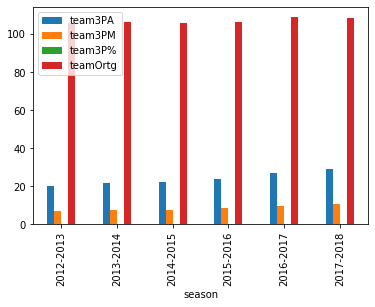

In [12]:
nba_data_3season.plot.bar()

In [13]:
fig = px.scatter(nba_data_3season, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(nba_data_3season.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='Different Seasons Three point performance vs. Team offensive rating')
fig.show()

We draw a scatter plot of 30 teams Three point performance vs. team Offensive rating in 6 seasons. x-coordinate is `team3PA`, size represents `team3P%`, and color represents `team3PM`. We can see that those teams who shoot more three points or have higher three-point percentage have higher Offensive rating. 

In [14]:
fig = px.scatter(df13, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(df13.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='2012-2013 Three point performance vs. Team offensive rating')
fig.show()

In [15]:
fig = px.scatter(df13, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(df14.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='2013-2014 Three point performance vs. Team offensive rating')
fig.show()

In [16]:
fig = px.scatter(df13, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(df15.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='2014-2015 Three point performance vs. Team offensive rating')
fig.show()

In [17]:
fig = px.scatter(df13, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(df16.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='2015-2016 Three point performance vs. Team offensive rating')
fig.show()

In [18]:
fig = px.scatter(df17, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(df17.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='2016-2017 Three point performance vs. Team offensive rating')
fig.show()

In [19]:
fig = px.scatter(df18, x = "team3PA", y = "teamOrtg", color="team3PM", size = "team3P%", text=list(df18.index))
fig.update_traces(textposition="bottom center", textfont_size=6)
fig.update_layout(title='2017-2018 Three point performance vs. Team offensive rating')
fig.show()

Furthermore, we look at the correlation coefficient of team Two point attempts and team Three point attempts with team Offensive rating. Result shows Three Point Attempts `team3PA` is positively correlated to team Offensive rating `teamOrtg`, while Two Point Attempts `team2PA` is negatively correlated to team Offensive rating `teamOrtg`. It turns out that if a team want to get a higher Offensive rating, they should increase their three-point attempts and reduce their two-point attempts. This result is kind of counterintuitive, since two-point percentage is relatively high compared with three-point percentage. 

In [20]:
nba_data.corr().loc[['team2PA','team3PA'],['teamOrtg']]

teamOrtg
team2PA -0.451923
team3PA  0.469426

In [21]:
fig = go.Figure()
data_scatter = go.Scatter3d(x=nba_data['team3PA'], y=nba_data['team2PA'], z=nba_data['teamOrtg'], 
                            mode="markers",
                            marker=dict(size=2))
fig.add_trace(data_scatter)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600)
fig

In [22]:
#Train-Test split
nba_train, nba_test = train_test_split(nba_data, test_size=0.25, random_state=100)
X_train , Y_train = nba_train[['team2PA','team3PA']] , nba_train['teamOrtg']
X_test , Y_test = nba_test[['team2PA','team3PA']] , nba_test['teamOrtg']

In [23]:
from sklearn.model_selection import KFold


def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data        
        split_X_train, split_X_valid = X_train[train_idx,:], X_train[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = model.score(split_X_valid,split_Y_valid)
        
        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [24]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.score(X_train, Y_train)

0.25874420975968415

In [26]:
compute_CV_error(model, np.array(X_train), np.array(Y_train))

0.2251548195795685

# 2.2.1 Prediction of players’ performance in NBA from their data in NCAA
# Binary classification

In [19]:
LR = LogisticRegression(multi_class = 'ovr', solver='lbfgs')

LR_results = compute_CV_error(LR, X_train, Y_train, 'notree')
print(LR_results)

RF = ensemble.RandomForestClassifier(n_estimators = 20,random_state = 42)
RF_results = compute_CV_error(RF, X_train.iloc[:,[0,1,2,3,4,5,6,7]], Y_train, 'notree')
print(RF_results)

# print(max(RF_results, key = lambda k:RF_results[k][1]))

DT = tree.DecisionTreeClassifier(random_state = 42)
DT_results = compute_CV_error(DT, X_train, Y_train, 'notree')
print(DT_results)
# print(max(DT_results, key = lambda k:DT_results[k][1]))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8041342232109752
0.7959492028179459
0.7059668149796071


In [20]:
LR = LogisticRegression(multi_class = 'ovr', solver='lbfgs')
LR_results, acc = forwardselection(LR, X_train, Y_train, 'notree')
print(acc)

RF = ensemble.RandomForestClassifier(n_estimators = 20,random_state = 42)
RF_results, acc = forwardselection(RF, X_train, Y_train, 'tree')
print(acc)

DT = tree.DecisionTreeClassifier(random_state = 42)
DT_results, acc = forwardselection(DT, X_train, Y_train, 'tree')
print(acc)
# print(max(DT_results, key = lambda k:DT_results[k][1]))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

0.8067139414163886
0.8024119391916946
0.8024110122358176


In [21]:
LR_results

{1: ([2], 0.8019836855765666),
 2: ([1, 2], 0.8024147200593251),
 3: ([1, 2, 4], 0.8028420467185763),
 4: ([1, 2, 4, 6], 0.8032740081572116),
 5: ([1, 2, 4, 6, 7], 0.8037022617723396),
 6: ([0, 1, 2, 4, 6, 7], 0.8054217649239896),
 7: ([0, 1, 2, 3, 4, 6, 7], 0.8067139414163886),
 8: ([0, 1, 2, 3, 4, 5, 6, 7], 0.8041342232109752)}

In [22]:
RF_results

{1: ([2], 0.8024119391916946),
 2: ([1, 2], 0.755929736744531),
 3: ([1, 2, 6], 0.7847599184278828),
 4: ([1, 2, 3, 6], 0.792081942899518),
 5: ([1, 2, 3, 6, 7], 0.792062476826103),
 6: ([1, 2, 3, 5, 6, 7], 0.7946598071931776),
 7: ([1, 2, 3, 4, 5, 6, 7], 0.7925074156470153),
 8: ([0, 1, 2, 3, 4, 5, 6, 7], 0.7959492028179459)}

In [23]:
DT_results

{1: ([2], 0.8024110122358176),
 2: ([2, 4], 0.7494530960326288),
 3: ([2, 4, 6], 0.7231868743047831),
 4: ([2, 4, 5, 6], 0.7326789024842417),
 5: ([2, 3, 4, 5, 6], 0.7232007786429365),
 6: ([1, 2, 3, 4, 5, 6], 0.716319058212829),
 7: ([1, 2, 3, 4, 5, 6, 7], 0.7197469410456062),
 8: ([0, 1, 2, 3, 4, 5, 6, 7], 0.7059668149796071)}

In [24]:
LR_test_acc = test_set_acc(LR, LR_results, X_train, Y_train, X_test, Y_test)
print(LR_test_acc)

RF_test_acc = test_set_acc(RF, RF_results, X_train, Y_train, X_test, Y_test)
print(RF_test_acc)

DT_test_acc = test_set_acc(DT, DT_results, X_train, Y_train, X_test, Y_test)
print(DT_test_acc)

[0, 1, 2, 3, 4, 6, 7]
0.8455598455598455
[2]
0.8455598455598455
[2]
0.8416988416988417


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Mutil Classification

In [25]:
LR = LogisticRegression(multi_class = 'ovr', solver='lbfgs')
LR_results = compute_CV_error(LR, X_train3, Y_train3, 'notree')
print(LR_results)

RF = ensemble.RandomForestClassifier(n_estimators = 20,random_state = 42)
RF_results = compute_CV_error(RF, X_train3, Y_train3, 'notree')
print(RF_results)

DT = tree.DecisionTreeClassifier(random_state = 42)
DT_results = compute_CV_error(DT, X_train3, Y_train3, 'notree')
print(DT_results)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

0.7417269187986651
0.7120207638116426
0.6018010752688172


In [26]:
LR = LogisticRegression(multi_class = 'ovr', solver='lbfgs')
LR_results, acc = forwardselection(LR, X_train3, Y_train3, 'notree')
print(acc)

RF = ensemble.RandomForestClassifier(n_estimators = 20,random_state = 42)
RF_results, acc = forwardselection(RF, X_train3, Y_train3, 'tree')
print(acc)

DT = tree.DecisionTreeClassifier(random_state = 42)
DT_results, acc = forwardselection(DT, X_train3, Y_train3, 'tree')
print(acc)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

0.743020022246941
0.7292445309603263
0.7292436040044493


In [66]:
LR = LogisticRegression(multi_class = 'ovr', solver='lbfgs')
LR_results, acc = forwardselection(LR, X_train3, Y_train3, 'notree')
LR_test_acc = test_set_acc(LR, LR_results, X_train3, Y_train3, X_test3, Y_test3)
print(LR_test_acc)

RF = ensemble.RandomForestClassifier(n_estimators = 20,random_state = 42)
RF_results, acc = forwardselection(RF, X_train3, Y_train3, 'notree')
RF_test_acc = test_set_acc(RF, RF_results, X_train3, Y_train3, X_test3, Y_test3)
print(RF_test_acc)

DT = tree.DecisionTreeClassifier(random_state = 42)
DT_results, acc = forwardselection(DT, X_train3, Y_train3, 'tree')
DT_test_acc = test_set_acc(DT, DT_results, X_train3, Y_train3, X_test3, Y_test3)
print(DT_test_acc)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

[1, 2, 4, 5, 6, 7]
0.6756756756756757
[2]
0.6833976833976834
[2]
0.6756756756756757


# 2.2.2 Prediction of game results based on previous games for teams from the same division

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('Desktop/basketball/2012-18_teamBoxScore.csv')

In [3]:
np.shape(data)

(14758, 123)

In [4]:
data.isna().sum()

gmDate        0
gmTime        0
seasTyp       0
offLNm1       0
offFNm1       0
             ..
opptAR        0
opptAST/TO    0
opptSTL/TO    0
poss          0
pace          0
Length: 123, dtype: int64

In [5]:
data.head()

gmDate gmTime  seasTyp    offLNm1 offFNm1    offLNm2  offFNm2  \
0  2012-10-30  19:00  Regular   Brothers    Tony      Smith  Michael   
1  2012-10-30  19:00  Regular   Brothers    Tony      Smith  Michael   
2  2012-10-30  20:00  Regular  McCutchen   Monty     Wright     Sean   
3  2012-10-30  20:00  Regular  McCutchen   Monty     Wright     Sean   
4  2012-10-30  22:30  Regular     Foster   Scott  Zielinski     Gary   

      offLNm3   offFNm3 teamAbbr  ... opptFIC40  opptOrtg  opptDrtg opptEDiff  \
0     Workman  Haywoode      WAS  ...   61.6667  105.6882   94.4447   11.2435   
1     Workman  Haywoode      CLE  ...   56.0417   94.4447  105.6882  -11.2435   
2  Fitzgerald      Kane      BOS  ...   80.8333  126.3381  112.6515   13.6866   
3  Fitzgerald      Kane      MIA  ...   62.7083  112.6515  126.3381  -13.6866   
4       Dalen      Eric      DAL  ...   58.6458   99.3678  108.1034   -8.7356   

   opptPlay%   opptAR  opptAST/TO  opptSTL/TO     poss     pace  
0     0.4390  16.7072      1.0476     33.3333  88.9409  88.9409  
1     0.3765  18.8679      2.0000     84.6154  88.9409  88.9409  
2     0.5244  19.8287      3.1250    100.0000  94.9832  94.9832  
3     0.4643  18.8501      1.5000     25.0000  94.9832  94.9832  
4     0.5000  18.6567      1.7143     42.8571  91.5790  91.5790  

[5 rows x 123 columns]

In [6]:
data.dtypes

gmDate         object
gmTime         object
seasTyp        object
offLNm1        object
offFNm1        object
               ...   
opptAR        float64
opptAST/TO    float64
opptSTL/TO    float64
poss          float64
pace          float64
Length: 123, dtype: object

In [7]:
data.describe()

teamMin    teamDayOff       teamPTS       teamAST        teamTO  \
count  14758.000000  14758.000000  14758.000000  14758.000000  14758.000000   
mean     241.794959      1.939897    102.293332     22.388535     14.365700   
std        7.617800      1.070836     12.222512      5.076511      3.904475   
min      226.000000      0.000000     58.000000      6.000000      2.000000   
25%      240.000000      1.000000     94.000000     19.000000     12.000000   
50%      240.000000      2.000000    102.000000     22.000000     14.000000   
75%      240.000000      2.000000    110.000000     26.000000     17.000000   
max      341.000000     11.000000    149.000000     47.000000     31.000000   

            teamSTL       teamBLK        teamPF       teamFGA       teamFGM  \
count  14758.000000  14758.000000  14758.000000  14758.000000  14758.000000   
mean       7.751592      4.862990     20.129286     84.100556     38.210394   
std        2.924281      2.577089      4.336582      7.259023      5.024314   
min        0.000000      0.000000      5.000000     60.000000     19.000000   
25%        6.000000      3.000000     17.000000     79.000000     35.000000   
50%        8.000000      5.000000     20.000000     84.000000     38.000000   
75%       10.000000      6.000000     23.000000     89.000000     42.000000   
max       21.000000     18.000000     42.000000    129.000000     58.000000   

       ...     opptFIC40      opptOrtg      opptDrtg     opptEDiff  \
count  ...  14758.000000  14758.000000  14758.000000  14758.000000   
mean   ...     63.090722    107.059271    107.059271      0.000000   
std    ...     13.433725     11.306481     11.306481     14.409942   
min    ...     15.729200     65.308000     65.308000    -62.409700   
25%    ...     53.867900     99.432950     99.432950     -9.539050   
50%    ...     62.552300    107.076350    107.076350      0.000000   
75%    ...     71.770800    114.543725    114.543725      9.539050   
max    ...    123.319300    155.624500    155.624500     62.409700   

          opptPlay%        opptAR    opptAST/TO    opptSTL/TO          poss  \
count  14758.000000  14758.000000  14758.000000  14758.000000  14758.000000   
mean       0.434978     17.017962      1.701230     58.041528     95.573705   
std        0.051903      3.245150      0.709634     28.486490      5.817019   
min        0.255800      5.576200      0.321400      0.000000     77.561700   
25%        0.400000     14.792900      1.222200     38.461500     91.598525   
50%        0.434800     16.991700      1.571400     53.333300     95.195600   
75%        0.469900     19.149200      2.000000     71.428600     98.982225   
max        0.637500     30.086000     10.000000    500.000000    131.144300   

               pace  
count  14758.000000  
mean      94.874310  
std        5.163021  
min       76.996500  
25%       91.332400  
50%       94.764000  
75%       98.266600  
max      121.656400  

[8 rows x 104 columns]

- The shape of the data is (14758, 123). There are NaN values in columns offLNm3 and offFNm3. Types and descriptive statistics of data are checked.

- EDA shows that each game is described twice in the perspectives of two teams, so a specific sequence of names is employed to filter the data. Only two teams from the same division have remained. Some useless columns with type as an object, like seasTyp, and those with NaN values are deleted.

In [8]:
#time transfer
data['time'] = pd.to_datetime(data['gmDate'])
data['year']=data['time'].dt.year
data['month']=data['time'].dt.month
data['day']=data['time'].dt.day

# row select
# (data['teamLoc'] =='Home') &
data = data[ (data['teamDiv'] == data['opptDiv'])]
data['tell'] = np.where( data['teamAbbr'] <= data['opptAbbr'], True, False)
data = data[data['tell'] == True]

data['Y'] = data["teamRslt"].map(lambda x: 'team' if x == 'Win' else 'oppt')
data['season'] = np.where( data['month'] <= 4, data['year'] - 1, data['year'])

# data.drop
data.drop(columns=['gmDate','gmTime','seasTyp','offLNm1','offFNm1','offLNm2','offFNm2','offLNm3','offFNm3',
                   'teamConf','teamRslt','teamLoc','teamDiv','opptLoc', 'opptRslt','opptConf','opptDiv','tell','year', 'month', 'day','teamDayOff','opptPTS'], inplace = True)

data.insert(1,'opptAbbr', data.pop('opptAbbr'))
data = data.sort_values(by=['teamAbbr', 'opptAbbr', 'season'])
data.reset_index(inplace= True, drop=True)
data['index'] = np.arange(np.shape(data)[0])
print(np.shape(data))
data.tail(30)

(1440, 108)


teamAbbr opptAbbr  teamMin  teamPTS  teamAST  teamTO  teamSTL  teamBLK  \
1410      PHO      SAC      240      101       24      13        9       11   
1411      PHO      SAC      240      104       19       9        8        3   
1412      PHO      SAC      240      117       20      21        6        5   
1413      PHO      SAC      241       92       22      12        5        4   
1414      PHO      SAC      240      111       26      11        5        5   
1415      PHO      SAC      239       97       18      15        6        5   
1416      POR      UTA      240       77       15      15        6        8   
1417      POR      UTA      240      105       25      16        2        6   
1418      POR      UTA      240       95       22      16        3        3   
1419      POR      UTA      240      102       25      16        2        2   
1420      POR      UTA      240      130       26      21        9        5   
1421      POR      UTA      240      105       23      11        6        6   
1422      POR      UTA      240      102       16      12        5        9   
1423      POR      UTA      240      111       23       8        7        3   
1424      POR      UTA      240      103       18      14        8        6   
1425      POR      UTA      240       76       12      13        5        5   
1426      POR      UTA      240       92       19      14        4        5   
1427      POR      UTA      240      105       22      13       11        4   
1428      POR      UTA      240      108       11      19        5        7   
1429      POR      UTA      240       96       19      11        1        0   
1430      POR      UTA      240       99       25      13        7       10   
1431      POR      UTA      240      115       20      14        7        6   
1432      POR      UTA      239      113       22      13        5        3   
1433      POR      UTA      238       88       14      17        9        3   
1434      POR      UTA      240       87       10       9        9        4   
1435      POR      UTA      239      101       15       3        6        5   
1436      POR      UTA      266      103       17      17        8        8   
1437      POR      UTA      242       96       16      13        7        4   
1438      POR      UTA      241      100       14      12       11        5   
1439      POR      UTA      240      102       19      10        9        9   

      teamPF  teamFGA  ...  opptPlay%   opptAR  opptAST/TO  opptSTL/TO  \
1410      25      107  ...     0.4270  16.4228      1.2222     44.4444   
1411      23      109  ...     0.4886  19.5914      2.1538     53.8462   
1412      25       77  ...     0.4526  13.5947      2.1111    144.4444   
1413      18       90  ...     0.4368  16.3196      2.3333    100.0000   
1414      19       85  ...     0.4568  18.8339      2.5556     66.6667   
1415      22       77  ...     0.3708  15.4895      2.0000     50.0000   
1416      22       79  ...     0.4118  15.7703      1.4615     53.8462   
1417      17       75  ...     0.4588  19.0416      4.8000    180.0000   
1418      18       67  ...     0.5181  19.3919      2.5000    120.0000   
1419      17       67  ...     0.5696  21.1520      4.3333    116.6667   
1420      17       83  ...     0.4239  12.5591      1.0000    100.0000   
1421      19       85  ...     0.4337  11.0997      1.0833     50.0000   
1422      19       91  ...     0.4157  15.8831      1.2500     50.0000   
1423      12       87  ...     0.4651  19.6910      2.0000     23.0769   
1424      20       76  ...     0.4815  14.4648      1.8000     80.0000   
1425      13       72  ...     0.4568  15.0653      1.6364    100.0000   
1426      18       81  ...     0.4430  10.7028      1.2000    110.0000   
1427      25       87  ...     0.4444  14.8721      1.1765     52.9412   
1428      25       77  ...     0.4074   7.4676      1.0000    133.3333   
1429      16       78  ...     0.5375  16.4019      3.1667    116.6667   
1

In [9]:
train = data[data['season'] < 2017]
train.reset_index(inplace= True, drop=True)
test = data[data['season'] == 2017]
test.reset_index(inplace= True, drop=True)
X_train = train[train['index'] % 4 != 3]
Y_train_table = train[train['index'] % 4 == 3]
# test.head(20)
# X_train.head(20)
X_train.drop(columns=['index'], inplace = True)
X_train.drop(columns=['Y','time'],inplace=True)
X_train.insert(2,'season', X_train.pop('season'))
X_train = X_train.groupby(['teamAbbr', 'opptAbbr', 'season']).agg(lambda x: np.average(x.values.tolist(),axis=0,weights=[0.01,0.4,1-0.01-0.4]))
X_train.head(20)

D:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


teamMin  teamPTS  teamAST  teamTO  teamSTL  teamBLK  \
teamAbbr opptAbbr season                                                        
ATL      CHA      2012     240.00   105.28    28.01   12.08     8.38     5.52   
                  2013     250.00   105.46    27.79   14.58     5.04     7.74   
                  2014     240.50   102.19    31.56   12.28     6.82     4.39   
                  2015     240.00    88.13    19.06   13.99     6.64     4.80   
                  2016     240.59    93.66    25.99   15.59     3.46     4.40   
         MIA      2012     240.00    90.79    23.12   18.12     6.78     1.63   
                  2013     250.00   119.87    31.29   15.51     7.60     2.22   
                  2014     240.00   100.81    23.90   19.53    10.78     3.40   
                  2015     240.00    87.51    17.92   15.79     8.80     3.38   
                  2016     239.42    97.00    18.65   15.25     9.64     7.18   
         ORL      2012     240.00    98.93    25.46   11.06     8.06     4.21   
                  2013     240.00    98.02    20.96   13.99     8.20     3.83   
                  2014     240.00    96.52    25.77   15.14     8.21     4.58   
                  2015     240.00    95.69    25.63   16.44     7.79     6.60   
                  2016     239.82   112.27    27.61   15.78     9.58     2.42   
         WAS      2012     255.00   101.61    21.30   15.77     8.82     5.76   
                  2013     250.00    98.64    22.79   16.20     7.02     1.05   
                  2014     240.00   111.01    27.93   11.97     9.89     2.44   
                  2015     240.00   113.92    28.45   15.19     8.03     5.39   
                  2016     240.40    88.68    19.70   19.21    10.24     5.99   

                          teamPF  teamFGA  teamFGM   teamFG%  ...  opptFIC40  \
teamAbbr opptAbbr season                                      ...              
ATL      CHA      2012     15.64    81.03    40.19  0.503632  ...  48.981270   
                  2013     18.42    87.31    38.16  0.437937  ...  58.897595   
                  2014     17.16    81.67    38.26  0.471762  ...  64.182792   
                  2015     18.96    83.82    32.86  0.391073  ...  74.465645   
                  2016     17.41    84.80    38.22  0.450578  ...  76.142544   
         MIA      2012     18.36    73.29    34.38  0.469878  ...  64.723958   
                  2013     25.95    84.93    42.71  0.503774  ...  68.449289   
                  2014     21.01    76.96    36.48  0.475736  ...  55.706230   
                  2015     22.11    75.80    29.50  0.388834  ...  66.385436   
                  2016     16.39    86.74    37.63  0.433292  ...  69.736452   
         ORL      2012     11.66    87.17    38.53  0.441783  ...  40.217728   
                  2013     21.32    77.89    33.67  0.431374  ...  75.137513   
                  2014     14.80    82.17    35.53  0.432594  ...  60.315612   
                  2015     15.88    86.47    37.44  0.436914  ...  60.272897   
                  2016     16.76    79.32    42.24  0.532384  ...  46.496183   
         WAS      2012     19.65    80.94    36.86  0.454489  ...  55.312591   
                  2013     12.27    79.48    35.03  0.441983  ...  69.369735   
                  2014     19.21    83.65    39.58  0.473245  ...  53.723945   
                  2015     16.18    81.68    42.18  0.515617  ...  66.671895   
                  2016     19.23    83.05    30.94  0.372426  ...  65.094212   

                            opptOrtg    opptDrtg  opptEDiff  opptPlay%  \
teamAbbr opptAbbr season                                                 
ATL      CHA      2012    100.035394  116.389957 -16.354563   0.382247   
                  2013     97.981025  108.083856 -10.102831   0.396243   
                  2014    108.286407  111.977904  -3.691497   0.440004   
                  2015    104.685064   91.741031  12.944033   0.386284   
                  2016    113.867311  

- For training and test datasets, X are final features, for each of which is the weighted combination of corresponding features in the previous three games for teams from the same division, and Y is the last game’s result. 

In [10]:
X=X_train.reset_index(drop=True)
X.head()

teamMin  teamPTS  teamAST  teamTO  teamSTL  teamBLK  teamPF  teamFGA  \
0   240.00   105.28    28.01   12.08     8.38     5.52   15.64    81.03   
1   250.00   105.46    27.79   14.58     5.04     7.74   18.42    87.31   
2   240.50   102.19    31.56   12.28     6.82     4.39   17.16    81.67   
3   240.00    88.13    19.06   13.99     6.64     4.80   18.96    83.82   
4   240.59    93.66    25.99   15.59     3.46     4.40   17.41    84.80   

   teamFGM   teamFG%  ...  opptFIC40    opptOrtg    opptDrtg  opptEDiff  \
0    40.19  0.503632  ...  48.981270  100.035394  116.389957 -16.354563   
1    38.16  0.437937  ...  58.897595   97.981025  108.083856 -10.102831   
2    38.26  0.471762  ...  64.182792  108.286407  111.977904  -3.691497   
3    32.86  0.391073  ...  74.465645  104.685064   91.741031  12.944033   
4    38.22  0.450578  ...  76.142544  113.867311  100.734777  13.132534   

   opptPlay%     opptAR  opptAST/TO  opptSTL/TO       poss       pace  
0   0.382247  16.563625    1.361979   40.469996  90.396954  90.396954  
1   0.396243  17.841426    2.910025   58.000025  97.685972  93.511132  
2   0.440004  19.530641    2.516991   36.507910  91.310334  91.112487  
3   0.386284  19.536114    1.763696   49.905516  96.244896  96.244896  
4   0.473259  21.315771    2.954407  116.166680  92.932465  92.710566  

[5 rows x 102 columns]

In [11]:
Y_train = Y_train_table['Y']
Y_train.head()

3     team
7     oppt
11    team
15    team
19    team
Name: Y, dtype: object

In [12]:
Y=Y_train.reset_index(drop=True)

In [13]:
len(Y)==len(X)

True

In [14]:
X-=X.mean()
X/=X.std()
X['r']=Y
X.head()

teamMin   teamPTS   teamAST    teamTO   teamSTL   teamBLK    teamPF  \
0 -0.365608  0.359992  1.391417 -0.738887  0.354250  0.286481 -1.338928   
1  1.477949  0.378045  1.338639  0.171057 -1.157306  1.451079 -0.481254   
2 -0.273430  0.050078  2.243066 -0.666092 -0.351746 -0.306310 -0.869984   
3 -0.365608 -1.360082 -0.755696 -0.043689 -0.433207 -0.091227 -0.314655   
4 -0.256838 -0.805446  0.906817  0.538675 -1.872354 -0.301064 -0.792855   

    teamFGA   teamFGM   teamFG%  ...  opptOrtg  opptDrtg  opptEDiff  \
0 -0.365831  0.635224  1.213630  ... -0.837417  1.037167  -1.421740   
1  0.699911  0.130150 -0.371586  ... -1.083886  0.079022  -0.865217   
2 -0.257221  0.155030  0.444609  ...  0.152481  0.528217  -0.294486   
3  0.107643 -1.188517 -1.502412  ... -0.279583 -1.806195   1.186394   
4  0.273954  0.145078 -0.066560  ...  0.822038 -0.768727   1.203174   

   opptPlay%    opptAR  opptAST/TO  opptSTL/TO      poss      pace     r  
0  -1.407972 -0.144341   -0.627786   -0.873862 -0.874009 -0.771715  team  
1  -1.049470  0.396843    2.025349   -0.035623  0.607367 -0.092317  oppt  
2   0.071451  1.112271    1.351743   -1.063319 -0.688379 -0.615612  team  
3  -1.304566  1.114589    0.060701   -0.422681  0.314491  0.504089  team  
4   0.923264  1.868322    2.101413    2.745751 -0.358707 -0.266971  team  

[5 rows x 103 columns]

In [15]:
X_test = test[test['index'] % 4 != 3]
Y_test_table = test[test['index'] % 4 == 3]
X_test.drop(columns=['index','season'], inplace = True)
X_test.drop(columns=['Y','time'],inplace=True)
X_test = X_test.groupby(['teamAbbr', 'opptAbbr']).agg(lambda x: np.average(x.values.tolist(),axis=0,weights=[0.01,0.4,1-0.01-0.4]))
X_test.head(20)

D:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


teamMin  teamPTS  teamAST  teamTO  teamSTL  teamBLK  \
teamAbbr opptAbbr                                                        
ATL      CHA        241.19   109.81    24.73   14.43     5.46     4.40   
         MIA        240.40   102.75    24.30   16.03     9.19     3.00   
         ORL        240.25   105.68    28.20   15.02     5.23     6.56   
         WAS        240.99   107.50    25.55   12.12     4.09     5.17   
BKN      BOS        241.18    93.17    16.75   15.17     3.22     8.12   
         NY         239.01   103.82    18.02   13.85     7.00     3.38   
         PHI        240.79   108.40    21.74   14.42     4.39     5.04   
         TOR        250.40   106.25    21.34   13.72     8.55     4.35   
BOS      NY         239.61    99.07    22.99   10.04     9.23     2.24   
         PHI        241.39   111.48    24.32   17.61     9.33     4.03   
         TOR        239.99   102.25    19.85   10.49     4.83     2.99   
CHA      MIA        240.58   102.15    21.59   11.74     8.20     5.17   
         ORL        240.61   104.16    22.45   13.24    13.52     4.43   
         WAS        240.64   126.47    26.37    9.43     8.18     5.40   
CHI      CLE        240.40   103.60    28.74   12.78     6.35     2.62   
         DET        239.99    90.32    23.80   13.42    10.40     0.67   
         IND        240.00   109.48    25.73   15.37     4.84     4.39   
         MIL        241.57   103.79    25.39   12.36     9.20     2.38   
CLE      DET        240.98   116.82    25.24   12.96     2.02     4.17   
         IND        240.01    97.92    20.66   12.04     8.74     3.99   

                   teamPF  teamFGA  teamFGM   teamFG%  ...  opptFIC40  \
teamAbbr opptAbbr                                      ...              
ATL      CHA        20.13    77.98    38.17  0.489984  ...  81.440793   
         MIA        18.22    85.88    37.39  0.435952  ...  63.745676   
         ORL        18.93    84.26    38.63  0.460228  ...  66.264596   
         WAS        17.48    90.94    39.16  0.430506  ...  83.244816   
BKN      BOS        16.10    92.58    33.69  0.363105  ...  60.783783   
         NY         22.17    85.27    33.98  0.399376  ...  79.655357   
         PHI        20.84    87.28    37.19  0.425491  ...  87.386410   
         TOR        22.15    91.90    36.57  0.398781  ...  74.506650   
BOS      NY         21.22    84.12    37.17  0.442734  ...  41.731733   
         PHI        18.86    84.95    41.72  0.491716  ...  58.729036   
         TOR        21.35    85.99    37.15  0.431218  ...  65.963509   
CHA      MIA        12.92    87.09    38.17  0.437454  ...  72.800262   
         ORL        16.29    86.50    36.55  0.422090  ...  53.757013   
         WAS        18.02    93.21    45.59  0.489096  ...  62.910737   
CHI      CLE        17.81    83.83    41.75  0.496824  ...  78.752303   
         DET        19.51    95.30    36.63  0.383987  ...  84.874994   
         IND        17.93    84.28    41.34  0.490419  ...  67.063978   
         MIL        18.48    93.39    39.66  0.423786  ...  70.827598   
CLE      DET        18.72    83.56    39.64  0.474566  ...  80.467035   
         IND        18.24    86.00    37.06  0.430898  ...  61.381794   

                     opptOrtg    opptDrtg  opptEDiff  opptPlay%     opptAR  \
teamAbbr opptAbbr                                                            
ATL      CHA       127.461926  114.637749  12.824177   0.487244  19.682494   
         MIA       103.982171  104.494962  -0.512791   0.421507  15.775167   
         ORL       108.623533  110.369065  -1.745532   0.434645  20.083300   
         WAS       122.304156  112.311246   9.992910   0.485182  23.892969   
BKN      BOS        97.210915   94.723508   2.487407   0.421460  12.503058   
         NY        117.783340  105.738347  12.044993   0.483575  18.783143   
         PHI       123.536968  111.788906  11.748062   0.511292  21.706778   
         TOR       112.851559  103.495297   9.356262   0.456561  16.950284   
BOS

In [16]:
X_test=X_test.reset_index(drop=True)
X_test-=X_test.mean()
X_test/=X_test.std()
X_test.head()

teamMin   teamPTS   teamAST    teamTO   teamSTL   teamBLK    teamPF  \
0  0.031544  0.465359  0.601408  0.148431 -0.775103 -0.130210  0.157395   
1 -0.243302 -0.386121  0.465145  0.756598  0.727565 -0.789504 -0.570508   
2 -0.295488 -0.032745  1.701024  0.372692 -0.867761  0.886985 -0.299926   
3 -0.038038  0.186759  0.861260 -0.729610 -1.327021  0.232401 -0.852523   
4  0.028064 -1.541528 -1.927390  0.429708 -1.677509  1.621626 -1.378442   

    teamFGA   teamFGM   teamFG%  ...  opptFIC40  opptOrtg  opptDrtg  \
0 -1.684362 -0.258932  0.930895  ...   1.474062  2.259727  0.715457   
1 -0.018000 -0.509770 -0.479485  ...  -0.369120 -0.620324 -0.576151   
2 -0.359709 -0.111001  0.154184  ...  -0.106741 -0.051009  0.171872   
3  1.049316  0.059440 -0.621640  ...   1.661975  1.627070  0.419194   
4  1.395245 -1.699645 -2.380987  ...  -0.677640 -1.450893 -1.820473   

   opptEDiff  opptPlay%    opptAR  opptAST/TO  opptSTL/TO      poss      pace  
0   1.381711   1.152003  0.851969    0.648174    0.671059 -0.316444 -0.326362  
1  -0.057495  -0.492687 -0.670608   -0.784134   -0.002545  0.277985  0.356015  
2  -0.190521  -0.163984  1.008152    0.469553    0.329016 -0.320670 -0.238386  
3   1.076186   1.100413  2.492675    0.887110   -0.740055 -0.392358 -0.387512  
4   0.266260  -0.493863 -1.945658    0.046380    2.188030  0.265132  0.261768  

[5 rows x 102 columns]

In [17]:
Y_test = Y_test_table['Y']
Y_test=Y_test.reset_index(drop=True)
len(Y_test)==len(X_test)

True

In [18]:
Y_test.head()

0    oppt
1    oppt
2    team
3    team
4    oppt
Name: Y, dtype: object

In [19]:
mapping = {'oppt': 0, 'team': 1}
Y_test=Y_test.replace(mapping)
X = X.replace({'r': mapping})

In [20]:
[col for col in X.columns if X[col].isnull().any()]

[]

In [21]:
cols_with_missing=[col for col in X_test.columns if X_test[col].isnull().any()]
cols_with_missing

['teamPTS6', 'teamPTS7', 'teamPTS8', 'opptPTS6', 'opptPTS7', 'opptPTS8']

In [22]:
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

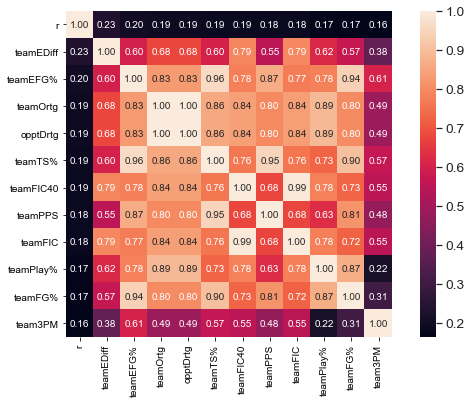

In [23]:
corrmat = X.corr()
k = 12
cols = corrmat.nlargest(k, 'r')['r'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
y = X['r']

#columns_to_delete = ['teamPPS', 'teamEFG%', 'opptDrtg', 'teamFIC']
columns_to_delete=[]
X.drop(columns_to_delete, axis=1, inplace=True)
X.drop(columns='r',inplace=True)

- LightGBM, a gradient boosting framework that uses tree-based learning algorithms, is employed to choose features, because it focuses on the accuracy of results and takes lower memory to run.

In [25]:
clf = lgb.LGBMClassifier(class_weight='balanced',drop_rate=0.9,min_data_in_leaf=100, max_bin=255,n_estimators=500,min_sum_hessian_in_leaf=1,importance_type='gain',learning_rate=0.1,bagging_fraction = 0.85,colsample_bytree = 1.0,feature_fraction = 0.1,lambda_l1 = 5.0,lambda_l2 = 3.0,max_depth=9,min_child_samples=55,min_child_weight = 5.0,min_split_gain = 0.1,num_leaves = 45,subsample = 0.75)
kf = StratifiedKFold(n_splits=5, shuffle=True)

predicts = []
for train_index, test_index in kf.split(X, y):
    print("##")
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
            early_stopping_rounds=20)

##
[1]	valid_0's binary_logloss: 0.693068
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.692259
[3]	valid_0's binary_logloss: 0.692829
[4]	valid_0's binary_logloss: 0.691368
[5]	valid_0's binary_logloss: 0.692361
[6]	valid_0's binary_logloss: 0.691323
[7]	valid_0's binary_logloss: 0.690324
[8]	valid_0's binary_logloss: 0.689108
[9]	valid_0's binary_logloss: 0.689257
[10]	valid_0's binary_logloss: 0.689499
[11]	valid_0's binary_logloss: 0.689274
[12]	valid_0's binary_logloss: 0.688746
[13]	valid_0's binary_logloss: 0.68923
[14]	valid_0's binary_logloss: 0.688326
[15]	valid_0's binary_logloss: 0.688244
[16]	valid_0's binary_logloss: 0.687961
[17]	valid_0's binary_logloss: 0.68841
[18]	valid_0's binary_logloss: 0.689177
[19]	valid_0's binary_logloss: 0.689392
[20]	valid_0's binary_logloss: 0.689235
[21]	valid_0's binary_logloss: 0.688743
[22]	valid_0's binary_logloss: 0.688743
[23]	valid_0's binary_logloss: 0.688968
[24]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.693346
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.694662
[3]	valid_0's binary_logloss: 0.694224
[4]	valid_0's binary_logloss: 0.691778
[5]	valid_0's binary_logloss: 0.692242
[6]	valid_0's binary_logloss: 0.690266
[7]	valid_0's binary_logloss: 0.689884
[8]	valid_0's binary_logloss: 0.688125
[9]	valid_0's binary_logloss: 0.687968
[10]	valid_0's binary_logloss: 0.689154
[11]	valid_0's binary_logloss: 0.68888
[12]	valid_0's binary_logloss: 0.687583
[13]	valid_0's binary_logloss: 0.687627
[14]	valid_0's binary_logloss: 0.688336
[15]	valid_0's binary_logloss: 0.688172
[16]	valid_0's binary_logloss: 0.687116
[17]	valid_0's binary_logloss: 0.688475
[18]	valid_0's binary_logloss: 0.68755
[19]	valid_0's binary_logloss: 0.688654
[20]	valid_0's binary_logloss: 0.687844
[21]	valid_0's binary_logloss: 0.686175
[22]	valid_0's binary_logloss: 0.687103
[23]	valid_0's binary_logloss: 0.686895
[24]	valid_0's binary_logloss:

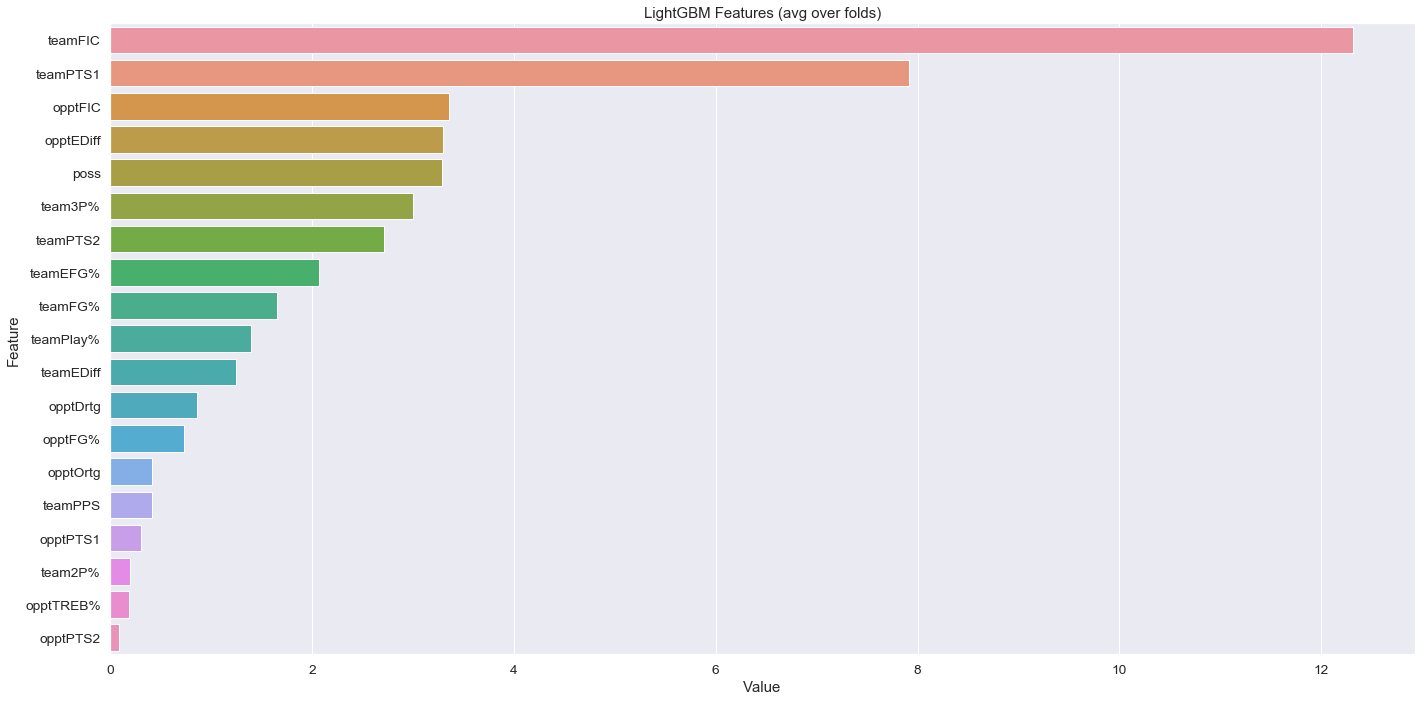

In [26]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[lambda x:x['Value']>0])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [27]:
feature_imp.sort_values(by="Value", ascending=False)[lambda x:x['Value']==0]['Feature'].values

array(['teamOrtg', 'teamFIC40', 'teamORB', 'teamMin', 'teamFTM',
       'teamFTA', 'teamFT%', 'teamFGA', 'teamFGM', 'teamDrtg',
       'teamDREB%', 'teamDRB', 'teamBLKR', 'teamOREB%', 'teamTO',
       'teamPF', 'teamPTS', 'teamPTS3', 'teamPTS4', 'teamPTS5', 'teamSTL',
       'teamSTL%', 'teamSTL/TO', 'oppt2PA', 'teamTO%', 'teamTRB',
       'teamTREB%', 'teamTS%', 'teamBLK%', 'oppt2P%', 'teamAST/TO',
       'opptBLKR', 'opptFTA', 'opptFT%', 'opptFIC40', 'opptFGM',
       'opptFGA', 'opptEFG%', 'opptDayOff', 'opptDREB%', 'opptDRB',
       'opptBLK%', 'opptMin', 'opptBLK', 'opptAST/TO', 'opptAST',
       'opptASST%', 'opptAR', 'oppt3PM', 'oppt3PA', 'oppt3P%', 'oppt2PM',
       'opptFTM', 'opptORB', 'teamAST', 'opptTO%', 'teamASST%', 'teamAR',
       'team3PM', 'team3PA', 'team2PM', 'team2PA', 'pace', 'opptTS%',
       'opptTRB', 'opptTO', 'opptOREB%', 'opptSTL/TO', 'opptSTL%',
       'opptSTL', 'opptPlay%', 'opptPTS5', 'opptPTS4', 'opptPTS3',
       'opptPPS', 'opptPF', 'teamBLK'], dtype=

In [28]:
feature_imp.sort_values(by="Value", ascending=False)[lambda x:x['Value']>0]

Value    Feature
95  12.311417    teamFIC
94   7.910010   teamPTS1
93   3.355499    opptFIC
92   3.294460  opptEDiff
91   3.288040       poss
90   2.995120    team3P%
89   2.712150   teamPTS2
88   2.068021   teamEFG%
87   1.649160    teamFG%
86   1.396660  teamPlay%
85   1.248470  teamEDiff
84   0.855524   opptDrtg
83   0.732304    opptFG%
82   0.416855   opptOrtg
81   0.415994    teamPPS
80   0.301167   opptPTS1
79   0.197303    team2P%
78   0.186647  opptTREB%
77   0.082114   opptPTS2

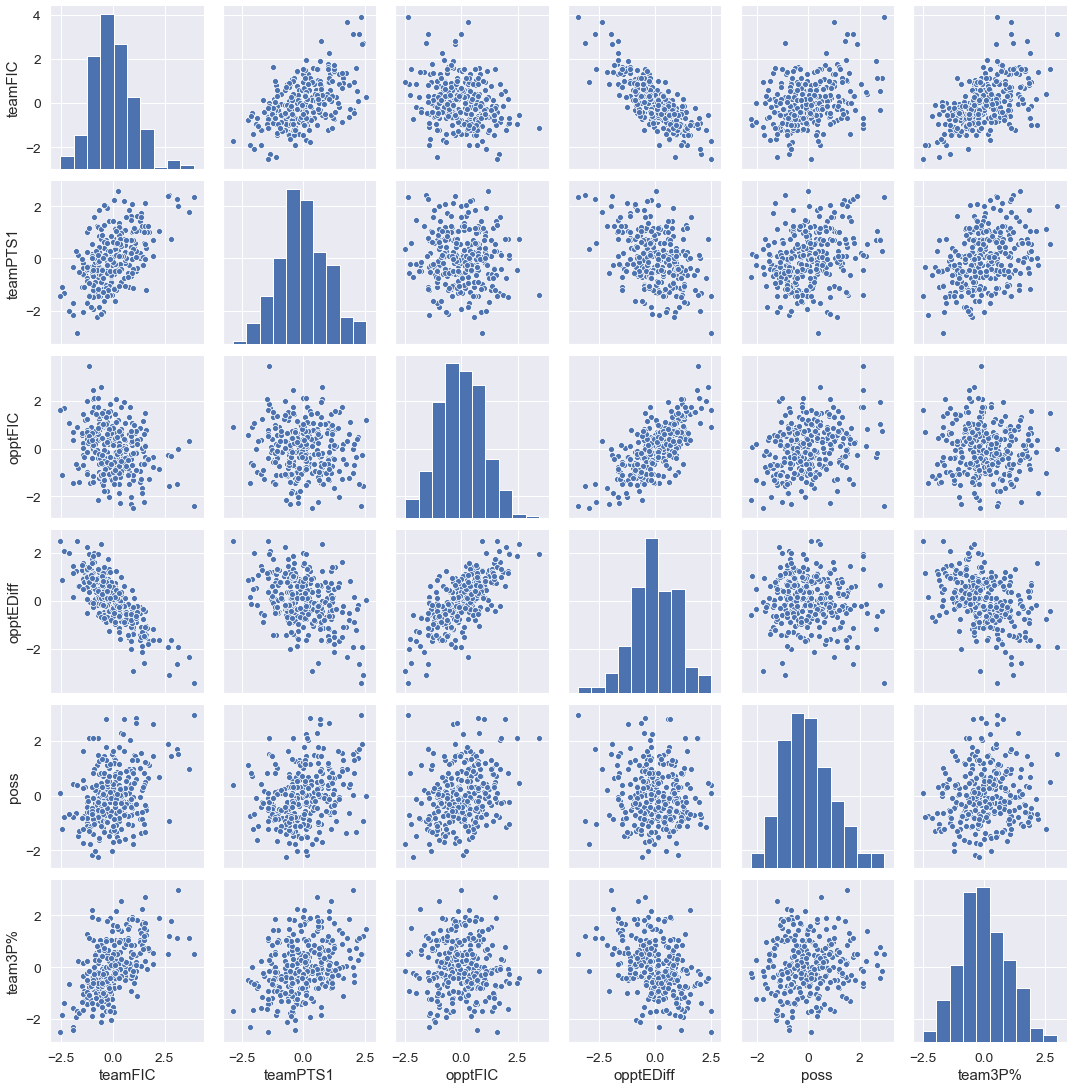

In [29]:
feature_columns = feature_imp.sort_values(by="Value", ascending=False)[lambda x:x['Value']>0]['Feature'].values.tolist()
sns.pairplot(X[feature_columns[0:6]], height=2.5)
plt.show()

- Common and effective classifiers like k-neighbors, random forest, and gradient boosting are compared with respect to the validation result.

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
results = []
result = accuracy_score(y_valid, pred) * 100
results.append(result)
print("validation accuracy:",result)
print("train accuracy:", cross_val_score(knn,X_train, y_train,scoring='accuracy',cv=5).mean()*100)

validation accuracy: 68.33333333333333
train accuracy: 53.75


In [32]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_valid)
result = accuracy_score(y_valid, pred) * 100
results.append(result)
print("validation accuracy:",result)
print("train accuracy:", cross_val_score(clf,X_train, y_train,scoring='accuracy',cv=5).mean()*100)

validation accuracy: 45.0
train accuracy: 58.75


In [33]:
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                    max_depth=1, random_state=0).fit(X_train, y_train)

result = clfgtb.score(X_valid, y_valid) * 100
results.append(result)
print("validation accuracy:",result)
print("train accuracy:", cross_val_score(clfgtb,X_train, y_train,scoring='accuracy',cv=5).mean()*100)

validation accuracy: 56.666666666666664
train accuracy: 54.58333333333333


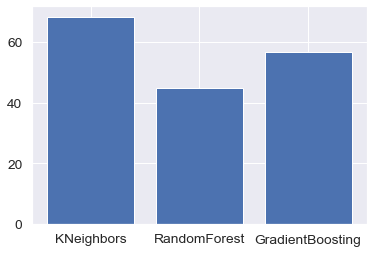

In [34]:
x = np.arange(3)

fig, ax = plt.subplots()
plt.bar(x, results)
plt.xticks(x, ('KNeighbors', 'RandomForest', 'GradientBoosting'))
plt.show()

- Gradient boosting builds tree one at a time, where each new tree helps to correct errors made by previously trained tree. It performs better than random tree if parameters are tuned carefully. K nearest neighbors stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

In [35]:
X = X[feature_columns]
x_new = X_test[feature_columns]
y_new = Y_test
x_new.head()
clss = knn.fit(X, y)
clss.score(x_new, y_new)

0.65

- We assumed the last game’s result is only related to the previous three games. After feature selection, final training and test datasets are formed based on these features. Also these features are standardized. Since k-neighbors get the best validation result, it is applied to do the final fitting and prediction work. The final test accuracy is 0.65. It is not good but not that bad. Based on our model, it is easy to know if a certain feature has a positive or negative effect on the final result.

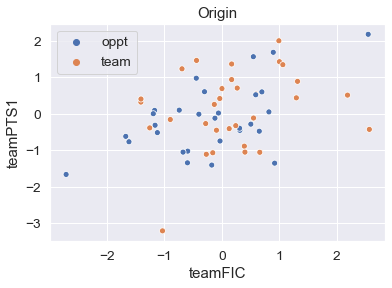

In [36]:
mapping2 = {0: 'oppt', 1: 'team'}
sns.scatterplot(data = x_new, x = feature_columns[0], y = feature_columns[1], hue = y_new.replace(mapping2).values)
plt.title('Origin')
plt.show()

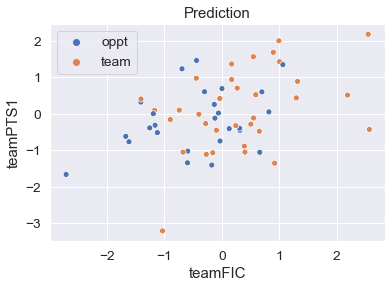

In [37]:
sns.scatterplot(data = x_new, x = feature_columns[0], y = feature_columns[1], hue = pd.DataFrame(knn.predict(x_new).tolist()).replace(mapping2)[0].values)
plt.title('Prediction')
plt.show()

- Conclusion: The efficiency differential for the team  (teamEDiff) of the previous three games has the largest correlation coefficient with the last game’s result, which is about 0.3. However, based on the feature selection, the floor impact counter for team  (teamFIC) of the previous three games has the largest feature importance value. Points scored by team  (teamPTS) of the previous three games are thought to be useful, but its feature importance value is 0. As mentioned above, features for the previous three games all have small correlation coefficients with the last game’s result. It disproves our assumption that we cannot predict which team could win in the fourth game very well only based on what we got from the previous three games. So audiences still can hope their favorite teams to reverse the situation. 

# 2.2.3 Winning Percentage Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import datetime 

In [2]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Data Cleaning 

First we look at a dataset of per-game stats for all NBA teams in the 2012-18 seasons. We can convert Loss-Win to 0-1, which will make it more easier for us to compute winning percentage.

In [4]:
df = pd.read_csv('2012-18_teamBoxScore.csv')
df['gmDate']= pd.to_datetime(df['gmDate']) 
df['teamRslt'] = df['teamRslt'].replace({'Loss': 0, 'Win': 1})
team=list(df['teamAbbr'].unique())

Drop those irrelevant columns(e.g. opponent statistics).

In [5]:
df_clean = df.loc[:,~(df.columns.str.startswith('oppt') | (df.columns.str.startswith('off')))]
df_clean = df_clean.drop(columns=['gmTime','seasTyp','teamConf','teamDiv','teamLoc','teamMin'])

By grouping data by team and using mean aggregate function, values in `teamRslt` turn to winning percentage of each team in each seasons.

In [6]:
#list of data points
list_df = []
for season in range(2012,2018):
    a = datetime.datetime(season, 9, 1) 
    b = datetime.datetime(season+1, 7, 1) 
    df_season = df_clean[(df_clean['gmDate']>a) & (df_clean['gmDate']<b)]
    df_one = df_season.groupby('teamAbbr').agg('mean')
    list_df.append(df_one)

In [7]:
k = 2012
for i in range(6):
    list_df[i]['season'] = str(k)+'-'+str(k+1)
    k = k+1

Each dataframe below represents a season final team statistics. For example, df13 represents 2012-2013 season 30 teams statistics(winning percentage, average points, etc.). Combine those dataframe together we can get a dataframe including 30 team final statistics for 6 seasons.

In [8]:
df13 = list_df[0]
df14 = list_df[1]
df15 = list_df[2]
df16 = list_df[3]
df17 = list_df[4]
df18 = list_df[5]
nba_data = df13.append(df14).append(df15).append(df16).append(df17).append(df18)

In [9]:
nba_data.head()

teamRslt  teamDayOff    teamPTS    teamAST     teamTO   teamSTL  \
teamAbbr                                                                    
ATL       0.536585    2.012195  97.951220  24.475610  14.865854  8.097561   
BKN       0.597561    2.000000  96.878049  20.341463  14.707317  7.304878   
BOS       0.506173    2.037037  96.518519  22.753086  14.580247  8.234568   
CHA       0.256098    2.012195  93.426829  19.353659  14.073171  7.195122   
CHI       0.548780    2.036585  93.182927  23.000000  14.280488  7.170732   

           teamBLK     teamPF    teamFGA    teamFGM  ...    teamOrtg  \
teamAbbr                                             ...               
ATL       4.500000  17.963415  81.024390  37.609756  ...  104.790709   
BKN       4.768293  18.292683  79.804878  35.878049  ...  108.316682   
BOS       4.506173  21.197531  79.740741  37.049383  ...  103.199075   
CHA       5.841463  19.048780  81.085366  34.426829  ...  101.542535   
CHI       5.085366  19.719512  81.682927  35.682927  ...  103.508767   

            teamDrtg  teamEDiff  teamPlay%     teamAR  teamAST/TO  teamSTL/TO  \
teamAbbr                                                                        
ATL       104.424877   0.365832   0.434633  18.867440    1.779402   58.132051   
BKN       106.349655   1.967027   0.439562  16.164246    1.503246   53.735435   
BOS       103.510258  -0.311183   0.430501  17.931032    1.628542   59.160886   
CHA       111.624296 -10.081761   0.410439  15.310763    1.466465   52.215484   
CHI       103.155329   0.353438   0.428205  17.872811    1.779382   54.711895   

               poss       pace     season  
teamAbbr                                   
ATL       93.464204  92.657738  2012-2013  
BKN       89.526429  88.761457  2012-2013  
BOS       93.621314  91.725846  2012-2013  
CHA       92.039016  91.468705  2012-2013  
CHI       90.013595  89.329641  2012-2013  

[5 rows x 54 columns]

# Feature Selection

We try to select features that best correlated to winning percentage. 

In [10]:
#Feature selection
nba_data_reindex = nba_data.reset_index()
nba_data_reindex = nba_data_reindex.drop(columns=['teamAbbr'])

Results below show correlation between different features and team winning percentage `teamRslt`. 

In [11]:
#Correlation between winning percentage and features
win_per = nba_data_reindex.corr().iloc[0,1:]
win_per

teamDayOff    0.006788
teamPTS       0.506946
teamAST       0.389025
teamTO       -0.213467
teamSTL       0.243208
teamBLK       0.323035
teamPF       -0.223739
teamFGA      -0.118245
teamFGM       0.444571
teamFG%       0.667805
team2PA      -0.319550
team2PM       0.049714
team2P%       0.606343
team3PA       0.228131
team3PM       0.340034
team3P%       0.573573
teamFTA       0.132885
teamFTM       0.206969
teamFT%       0.212633
teamORB      -0.149724
teamDRB       0.348877
teamTRB       0.214581
teamPTS1      0.499218
teamPTS2      0.430711
teamPTS3      0.493390
teamPTS4      0.236340
teamPTS5      0.115789
teamPTS6      0.020747
teamPTS7      0.073349
teamPTS8      0.002177
teamTREB%     0.431368
teamASST%     0.197177
teamTS%       0.696070
teamEFG%      0.673935
teamOREB%     0.021201
teamDREB%     0.138830
teamTO%      -0.179670
teamSTL%      0.258701
teamBLK%      0.319514
teamBLKR      0.441098
teamPPS       0.677030
teamFIC       0.718379
teamFIC40     0.715246
teamOrtg   

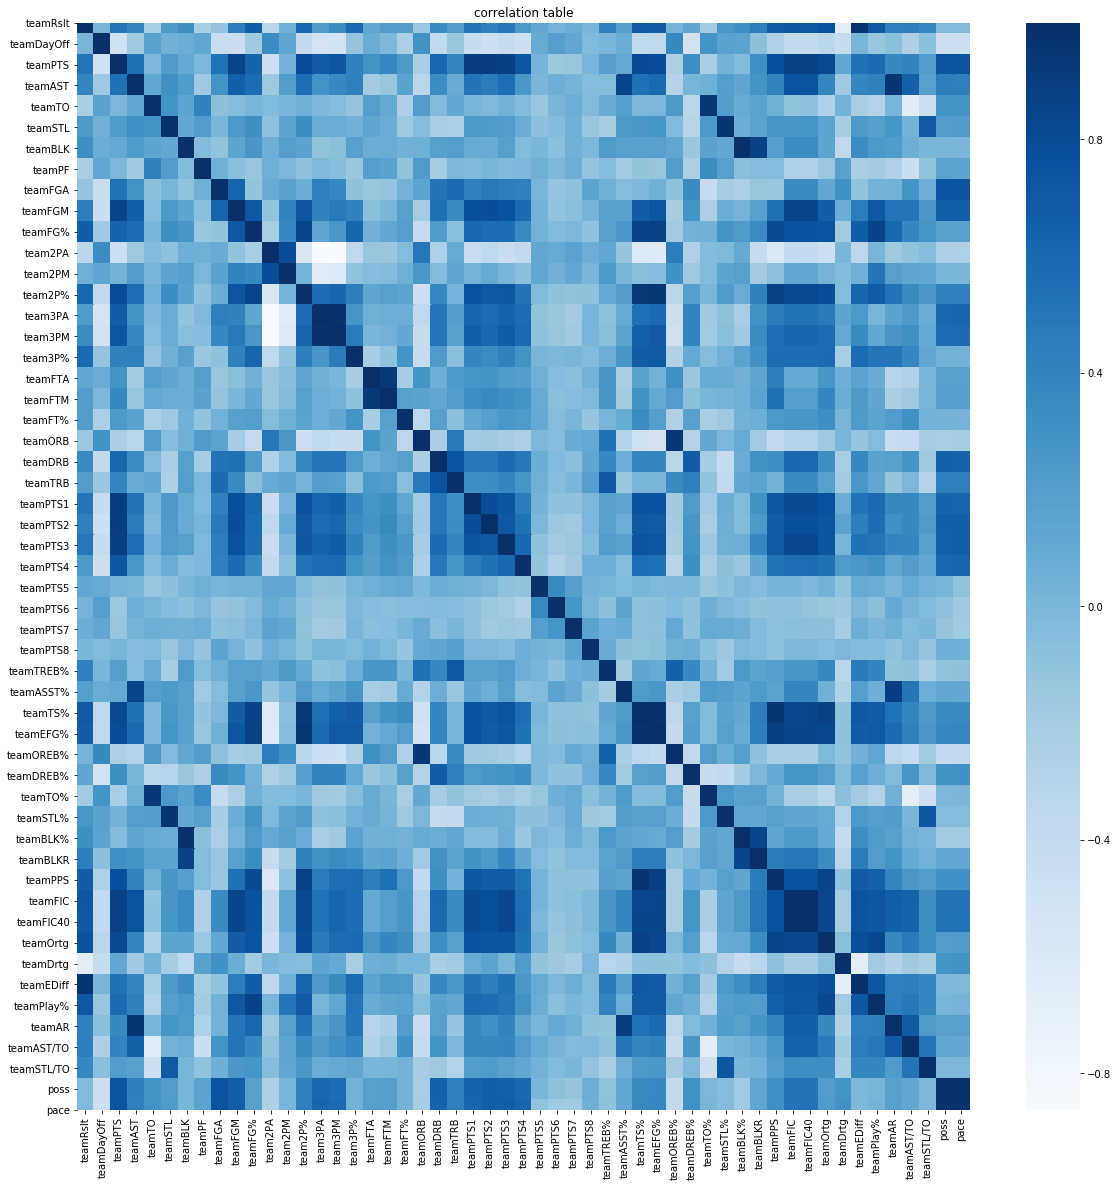

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(nba_data_reindex).corr(), cmap="Blues")
plt.title('correlation table')
plt.show()

Finally, we find `teamEDiff` has the largest correlation coefficient 0.97. 

In [13]:
print('Maximum correlation:',win_per.max())
print('Maximum correlation feature:',win_per.idxmax())

Maximum correlation: 0.9704983620005218
Maximum correlation feature: teamEDiff


Next, we try to find a feature that has the second largest correlation coefficient with `teamRslt` and smallest correlation coefficient with `teamEDiff`. But we can't get any other desirable features. So finally we select `teamEDiff`.

In [14]:
teamRslt_corr = nba_data_reindex.corr().loc[:,['teamRslt']].reset_index()
teamEDiff_corr = nba_data_reindex.corr().loc[:,['teamEDiff']].reset_index()
teamRslt_corr.merge(teamEDiff_corr, left_on='index', right_on='index', how='inner')

index  teamRslt  teamEDiff
0     teamRslt  1.000000   0.970498
1   teamDayOff  0.006788   0.010377
2      teamPTS  0.506946   0.530484
3      teamAST  0.389025   0.394420
4       teamTO -0.213467  -0.212447
5      teamSTL  0.243208   0.237068
6      teamBLK  0.323035   0.333606
7       teamPF -0.223739  -0.215961
8      teamFGA -0.118245  -0.104077
9      teamFGM  0.444571   0.454026
10     teamFG%  0.667805   0.667092
11     team2PA -0.319550  -0.332168
12     team2PM  0.049714   0.042871
13     team2P%  0.606343   0.615447
14     team3PA  0.228131   0.246850
15     team3PM  0.340034   0.354863
16     team3P%  0.573573   0.565019
17     teamFTA  0.132885   0.157959
18     teamFTM  0.206969   0.238324
19     teamFT%  0.212633   0.229616
20     teamORB -0.149724  -0.124618
21     teamDRB  0.348877   0.372584
22     teamTRB  0.214581   0.253181
23    teamPTS1  0.499218   0.514829
24    teamPTS2  0.430711   0.446549
25    teamPTS3  0.493390   0.532576
26    teamPTS4  0.236340   0.253898
27    teamPTS5  0.115789   0.094055
28    teamPTS6  0.020747  -0.004231
29    teamPTS7  0.073349   0.063149
30    teamPTS8  0.002177  -0.030026
31   teamTREB%  0.431368   0.475612
32   teamASST%  0.197177   0.198416
33     teamTS%  0.696070   0.707864
34    teamEFG%  0.673935   0.680109
35   teamOREB%  0.021201   0.046520
36   teamDREB%  0.138830   0.172262
37     teamTO% -0.179670  -0.186684
38    teamSTL%  0.258701   0.249848
39    teamBLK%  0.319514   0.328479
40    teamBLKR  0.441098   0.457279
41     teamPPS  0.677030   0.693564
42     teamFIC  0.718379   0.740231
43   teamFIC40  0.715246   0.738012
44    teamOrtg  0.756408   0.782315
45    teamDrtg -0.659261  -0.675855
46   teamEDiff  0.970498   1.000000
47   teamPlay%  0.709646   0.720932
48      teamAR  0.436863   0.435352
49  teamAST/TO  0.444430   0.451398
50  teamSTL/TO  0.380850   0.382893
51        poss -0.027738  -0.017947
52        pace -0.032481  -0.020734

# Model Fitting
In this part, we try to use linear regression model to fit `teamEDiff` and `teamRslt`.

Firstly, we split the data to train dataset and test dataset. 

In [15]:
#Train-Test split
nba_train, nba_test = train_test_split(nba_data, test_size=0.25, random_state=100)
X_train , Y_train = nba_train[['teamEDiff']] , nba_train['teamRslt']
X_test , Y_test = nba_test[['teamEDiff']] , nba_test['teamRslt']

In [16]:
#Linear Regression
model = LinearRegression(fit_intercept=True)

Using cross validation to calculate Root mean squared error of mdoel. 

In [17]:
from sklearn.model_selection import KFold


def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    validation_R = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data        
        split_X_train, split_X_valid = X_train[train_idx,:], X_train[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = mean_squared_error(model.predict(split_X_valid),split_Y_valid)
        R_squared = model.score(split_X_valid,split_Y_valid)
        
        validation_errors.append(error)
        validation_R.append(R_squared)
        
    return np.mean(validation_errors), np.mean(validation_R)

In [18]:
print('RMSE and R-squared of training data:', compute_CV_error(model, np.array(X_train), np.array(Y_train)))

RMSE and R-squared of training data: (0.0014977862198000931, 0.9187656338466039)


In [19]:
print('R-squared of testing data:', model.score(X_test,Y_test))
print('RMSE of testing data:', mean_squared_error(model.predict(X_test),Y_test))

R-squared of testing data: 0.9635816372044614
RMSE of testing data: 0.0011581391322772645


Nest, we try to use Ridge Regression model to fit the data.

In [20]:
from sklearn.linear_model import RidgeCV
R_model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5).fit(X_train, Y_train)
print('R-squared of testing data:', R_model.score(X_test, Y_test))
print('RMSE of testing data:', mean_squared_error(R_model.predict(X_test),Y_test))
print('best alpha:', R_model.alpha_)

R-squared of testing data: 0.9646084448379582
RMSE of testing data: 0.0011254856572061847
best alpha: 1.0


Finally, we try to use Lasso Regression model to fit the data.

In [21]:
from sklearn.linear_model import LassoCV
L_model = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5).fit(X_train, Y_train)
print('R-squared of testing data:', L_model.score(X_test, Y_test))
print('RMSE of testing data:', mean_squared_error(L_model.predict(X_test),Y_test))
print('best alpha:', L_model.alpha_)

R-squared of testing data: 0.9644154110356886
RMSE of testing data: 0.001131624318669793
best alpha: 0.001


Finally we draw our fitted model and scatter plot of those data. As we can see, our results are pretty good, and we can say we can use Team Efficiency differential`teamEDiff` to predict team winning percentage `teamRslt`.

/Users/xuruinan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



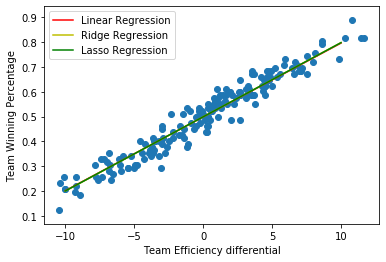

In [22]:
#Visualization
plt.scatter(nba_data['teamEDiff'],nba_data['teamRslt'])
x=np.arange(-10,11)
plt.plot(x,model.coef_*x+model.intercept_,'r',label='Linear Regression')
plt.plot(x,R_model.coef_*x+R_model.intercept_,'y',label='Ridge Regression')
plt.plot(x,L_model.coef_*x+L_model.intercept_,'G',label='Lasso Regression')
plt.xlabel('Team Efficiency differential')
plt.ylabel('Team Winning Percentage')
plt.legend()